## 4_3.線形単回帰分析

In [2]:
import numpy as np

def lineareg(x, y):
    """ 原点を通る線形単回帰モデルにおける回帰係数を返す
    Args:
        x (ndarray): 説明変数
        y (ndarray): 目的変数
    Returns:
        float: 回帰係数
    """
    a = np.dot(x, y) / (x**2).sum()
    return a

In [3]:
# ダミーの説明変数を作成
x = np.array([1, 2, 4, 6, 7, 9])
# ダミーの目的変数を作成
y = np.array([1, 3, 4, 5, 7, 10])

# 回帰係数を求める
a = lineareg(x, y)
# 回帰係数を出力
a

1.0267379679144386

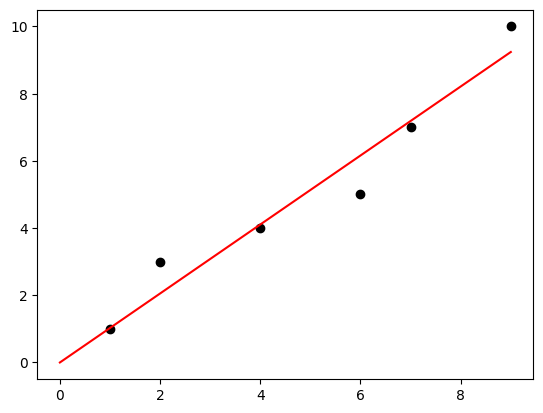

In [4]:
import matplotlib.pyplot as plt

# xとyの散布図をプロット
plt.scatter(x, y, color='black')
# 説明変数の最大値を求める
xm = x.max()
# 単回帰直線をプロット
plt.plot([0, xm], [0, a*xm], color='red')
# グラフを出力
plt.show()

In [6]:
import pandas as pd

# CSVファイルのデータをデータフレームに読み込む
df = pd.read_csv('sales.csv')
# 最高気温列のデータをNumPyに配列として取得
x = df['最高気温'].values
# 清涼飲料売上数列のデータをNumPy配列として取得
y = df['清涼飲料売上数'].values


In [11]:
import numpy as np

def lineareg(x, y):
  """ 線形単回帰モデルにおける回帰係数と切片を求める
  Args:
      x (ndarray): 説明変数
      y (ndarray): 目的変数
  Returns:
      a (float): 回帰係数
      b (float): 切片
  """
  # xのデータ数
  n = len(x)
  # 回帰係数を求める
  a = (np.dot(x, y) - (y.sum()*x.sum() / n)) / ((x**2).sum() - x.sum()**2 / n)
  # 切片を求める
  b = (y.sum() - a*x.sum()) / n

  return a, b

In [12]:
# 回帰係数と切片を求める
a, b = lineareg(x, y)
# 回帰係数を出力
print(a)
# 切片の値を出力
print(b)

33.74080524536438
-760.8771642249819


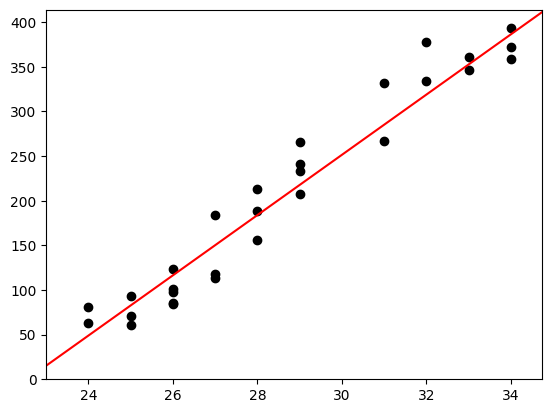

In [14]:
import matplotlib.pyplot as plt

# xとyの散布図をプロット
plt.scatter(x, y, color='black')
# 回帰直線をプロット
plt.plot(
    # x軸の値は0から気温の最大値まで
    [0, x.max()],
    # y軸の値は切片bから回帰係数x気温の最大値+切片
    [b, a*x.max() + b],
    color='red'
)
# x軸とy軸のスケールを設定
plt.axis(
    [x.min() - 1, a.max() + 1, 0, y.max() + 20]
)
# グラフを出力
plt.show()

In [15]:
# 予測値を求める
y_pred = a*x + b
print(y_pred)

[116.38377215  82.64296691 116.38377215  48.90216166  82.64296691
  48.90216166 116.38377215 116.38377215  82.64296691 150.1245774
 150.1245774  116.38377215 183.86538265 183.86538265 150.1245774
 183.86538265 217.60618789 217.60618789 217.60618789 285.08779838
 285.08779838 217.60618789 318.82860363 352.56940887 386.31021412
 352.56940887 386.31021412 420.05101936 318.82860363 386.31021412]


In [16]:
# 決定係数を求める
1 - ((y - (a*x + b))**2).sum() / ((y - np.mean(y))**2).sum()

0.9413818994683985